In [1]:
import matplotlib.pyplot as pyplot
import numpy as np

In [2]:
points = [
[1.999, 1.068],[2.145, -0.345],[-0.127, 29.477],[-3.169, 15.497],[-1.148, 38.699],[4.672, 20.617],[5.028, 33.685],
[3.373, -2.843],[1.799, 3.085],[-1.244, 38.867],[-2.197, 35.542],[0.266, 24.383],[-3.459, 5.649],[3.576, -1.316],
[0.746, 17.275],[-4.076, -22.958],[4.118, 6.484],[-1.086, 38.379],[-2.917, 22.693],[0.973, 13.97],[3.331, -3.042],
[-3.923, -14.746],[2.264, -1.436],[3.074, -3.991],[0.08, 26.935],[0.24, 24.647],[1.742, 3.765],[2.065, 0.175],
[4.469, 14.606],[4.486, 15.079],[-3.587, 0.581],[2.806, -3.902],[2.67, -3.679],[3.586, -1.241],[-3.349, 9.577],
[-4.083, -23.324],[-3.888, -13.045],[4.063, 5.581],[5.327, 46.795],[-0.832, 36.858],[-0.393, 32.679],[-4.087, -23.357],
[-0.78, 36.248],[-2.533, 30.834],[1.434, 7.706],[1.075, 12.623],[0.167, 25.772],[-1.558, 39.352],[1.654, 4.835],
[-2.346, 33.615]]

points.sort(key=lambda x: x[0])

In [3]:
X = [points[i][0] for i in range(len(points))]
Y = [points[i][1] for i in range(len(points))]

In [4]:
def map_list(f, x): 
    return list(map(f,x))

In [5]:
def f(x):
    return (x + 3.6) * (x - 2.1) * (x - 3.7)

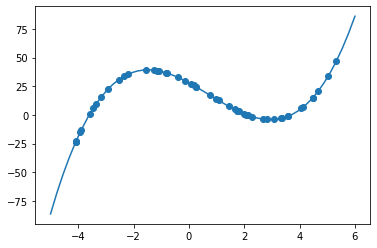

In [6]:
pyplot.scatter(X,Y)
pyplot.plot(np.linspace(-5.0, 6.0), map_list(f, np.linspace(-5.0, 6.0)) )
pyplot.show()

In [7]:
def h(x):
    index = X.index(x)
    return Y[index];

def diff_quot(x, f):
    n = len(x) - 1
    result = map_list(f, x)
    for i in range(1, n+1):
        for j in range(n, i-1, -1):
            result[j] = (result[j] - result[j - 1]) / ( x[j] - x[j-i] )
    return result

diff_quots = diff_quot(X,h)

def newton_interpol(x):
    result = 0
    result_aux = 1
    for i in range(len(diff_quots)):
        result += diff_quots[i] * result_aux
        result_aux *= (x - X[i])
    return result

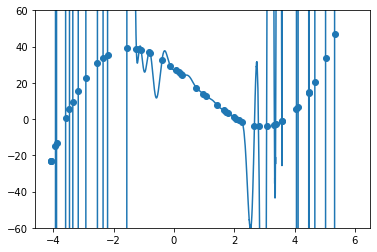

In [8]:
pyplot.scatter(X,Y)
pyplot.plot(np.linspace(-4,6,num=10000), map_list(newton_interpol, np.linspace(-4,6,num=10000)))
pyplot.ylim(-60,60)
pyplot.show()

In [9]:
class Memorize:

    def __init__(self, fn):
        self.fn = fn
        self.memo = {}

    def __call__(self, *args):
        if args not in self.memo:
            self.memo[args] = self.fn(*args)
        return self.memo[args]

In [10]:
@Memorize
def dot_product(f,h):
    result = 0
    for x in X:
        result+= f(x)*h(x)
    return result;

In [11]:
@Memorize
def Pk_value(k, x):
    if k == 0:
        return 1
    if k == 1:
        return x - ck(1)
    return (x - ck(k)) * Pk_value(k-1, x) - dk(k) * Pk_value(k-2, x)

def P(k):
    return lambda x: Pk_value(k,x)

@Memorize
def ck(k):
    return dot_product( lambda x: x * P(k-1)(x), P(k-1)) / dot_product(P(k-1), P(k-1))

@Memorize
def dk(k):
    return dot_product( P(k-1), P(k-1)) / dot_product(P(k-2), P(k-2))

In [12]:
def ak(k):
    return dot_product(h, P(k)) / dot_product(P(k), P(k))

In [13]:
@Memorize
def clenshaw(x,k,m):
    if k == m+2 or k == m+1: return 0
    return ak(k) + (x - ck(k+1)) * clenshaw(x,k+1,m) - dk(k+2) * clenshaw(x,k+2,m)


In [14]:
def w_val(x,m):
    return clenshaw(x,0,m)

def w(m): return lambda x: w_val(x,m)

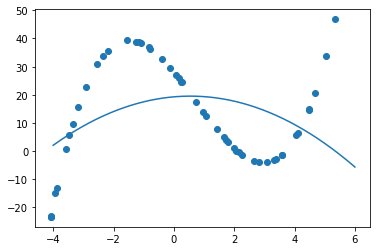

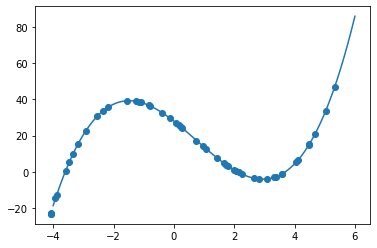

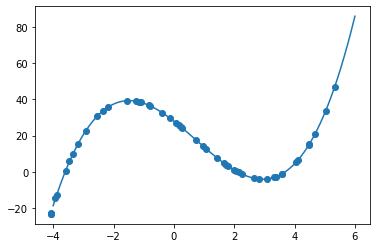

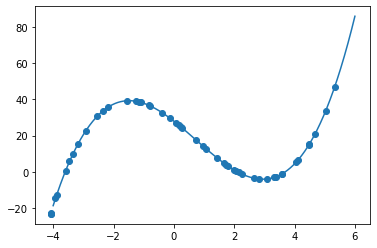

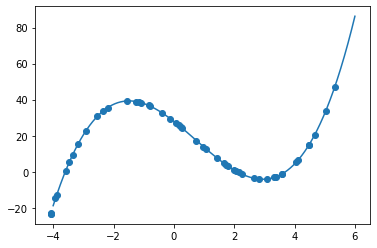

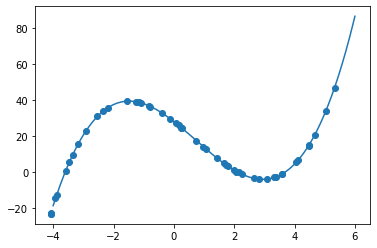

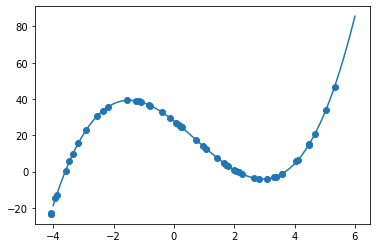

In [15]:
for i in range(2,9):
    pyplot.scatter(X,Y)
    pyplot.plot(np.linspace(-4,6,num=1000), map_list(w(i), np.linspace(-4,6,num=1000)))
    pyplot.show()